In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:

print(5*16*5*2)
# 5 datasets 16 threads 5 loops and 2 core modes
# 800 in runtime 160 for every dataset
# 400 for every socket
# 80 for every dataset divided by socket


9*8

800


72

In [3]:
import re
import itertools
import matplotlib.pyplot as plt 

workfile = r"C:\Users\kevinpawiroredjo\traindata2411.txt"
workfile2 = r"C:\Users\kevinpawiroredjo\traindata_end.txt"

# results_sockets_newmodel:62,256,512,1024,2048

# results_new_datasets:1280,1532,1792,2304,2560

# traindata2411 1028.dat 1152.dat 1280.dat 1408.dat 1532.dat 1658.dat 1792.dat  2048.dat  2176.dat      

# traindata_end 2304.dat 2432.dat 2560.dat 

print(workfile)


#ALL FUNCTIONS



#function that divides a list in n portions. getting every nth elementh.
def dividebyN(divide,n):
    x=0
    newlist = []
    while x <= len(divide):
        newlist.append(divide[x:x+n])
        x +=n
    return newlist


def makeAverageValue(averaging_list,threads):
    """
    make a list with the average value based on the amount of threads.
    
    """
    loop = dividebyN(averaging_list,threads)
    average = []
    for val in range(threads):
        values = []
        for result in range(len(loop[0][0])):
            value = 0
            for experiment in loop:
                if not experiment:
                    continue
                value+=float(experiment[val][result])
            average.append(value/len(loop))
    return average


def analyse_data(workfile):
    """
        
        analyses the given file by sorting into total energy, power and runtime.
    
    """
    variable = re.compile("(\d) thread (.*)")
    energy = re.compile("Energy consumed: (.*) Joules")
    power = re.compile("Power consumed: (.*) Watt")
    runtime = re.compile("Runtime: (.*) s")
    variable_results = [re.findall(variable,line) for line in open(workfile) if re.findall(variable,line) !=[]]
    energy_results = [re.findall(energy,line) for line in open(workfile) if re.findall(energy,line) !=[]]
    power_results = [re.findall(power,line) for line in open(workfile) if re.findall(power,line) !=[]]
    runtime_results = [re.findall(runtime,line) for line in open(workfile) if re.findall(runtime,line) !=[]]
    
    
    powerconsumption = []
    energyconsumption = []
    testrange = 0
    testpower = []
    testenergy = []
    # separate values in lists for each test
    for i in range(len(power_results)):
        testrange+=1
        testpower.append(float(power_results[i][0]))
        testenergy.append(float(energy_results[i][0]))


        if testrange == 6:
            testrange = 0
            powerconsumption.append(testpower)
            energyconsumption.append(testenergy)
            testpower = []
            testenergy = []
    return [variable_results,energyconsumption,powerconsumption,runtime_results]


# Execute to initialise all variables.



#6 per variable in power and in energy
#5 datasets
#2 socketdiff
#16 different threadsizes
#5 loops



threads = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
threads_no_ht = [1,2,3,4,5,6,7,8]



C:\Users\kevinpawiroredjo\traindata2411.txt


In [4]:
# 5 datasets 16 threads 5 loops and 2 core modes
# 800 in runtime 160 for every dataset
# 400 for every socket
# 80 for every dataset divided by socket


analysed_data = analyse_data(workfile)

variable_results = analysed_data[0][:1440]
energyconsumption = analysed_data[1][:1440]
powerconsumption = analysed_data[2][:1440]
runtime_results = analysed_data[3][:1440]




#dividing per dataset
#every variable in here is divided into one or two socket variants of the given variable.
"""
The variable samples is a list of all datasets list
Every dataset list comprises of 80 values which are the loops and the amount of threads.
so this dataset list is all the loops and values of a given dataset

"""
one_socket_runtime_samples = dividebyN([runtime_results[i] for i in range(len(runtime_results)) if i%2 == 0],80)[:9]
two_socket_runtime_samples = dividebyN([runtime_results[i] for i in range(len(runtime_results)) if i%2 == 1],80)[:9]
one_socket_energy_samples = dividebyN([energyconsumption[i] for i in range(len(energyconsumption)) if i%2 == 0],80)[:9]
two_socket_energy_samples = dividebyN([energyconsumption[i] for i in range(len(energyconsumption)) if i%2 == 1],80)[:9]
one_socket_power_samples = dividebyN([powerconsumption[i] for i in range(len(powerconsumption)) if i%2 == 0],80)[:9]
two_socket_power_samples = dividebyN([powerconsumption[i] for i in range(len(powerconsumption)) if i%2 == 1],80)[:9]

"""
same as the sample result only this time the 80 values get averaged out on thread level to give 16 values back.
This corresponds with the amount of threads.
"""


one_socket_runtime = [makeAverageValue(dataset,16) for dataset in one_socket_runtime_samples]
two_socket_runtime = [makeAverageValue(dataset,16) for dataset in two_socket_runtime_samples]
one_socket_energy = [makeAverageValue(dataset,16) for dataset in one_socket_energy_samples]
two_socket_energy = [makeAverageValue(dataset,16) for dataset in two_socket_energy_samples]
one_socket_power = [makeAverageValue(dataset,16) for dataset in one_socket_power_samples]
two_socket_power = [makeAverageValue(dataset,16) for dataset in two_socket_power_samples]

analysed_data2 = analyse_data(workfile2)

variable_results2 = analysed_data2[0]
energyconsumption2 = analysed_data2[1]
powerconsumption2 = analysed_data2[2]
runtime_results2 = analysed_data2[3]

one_socket_runtime_samples2 = dividebyN([runtime_results2[i] for i in range(len(runtime_results2)) if i%2 == 0],80)[:3]
two_socket_runtime_samples2 = dividebyN([runtime_results2[i] for i in range(len(runtime_results2)) if i%2 == 1],80)[:3]
one_socket_energy_samples2 = dividebyN([energyconsumption2[i] for i in range(len(energyconsumption2)) if i%2 == 0],80)[:3]
two_socket_energy_samples2 = dividebyN([energyconsumption2[i] for i in range(len(energyconsumption2)) if i%2 == 1],80)[:3]
one_socket_power_samples2 = dividebyN([powerconsumption2[i] for i in range(len(powerconsumption2)) if i%2 == 0],80)[:3]
two_socket_power_samples2 = dividebyN([powerconsumption2[i] for i in range(len(powerconsumption2)) if i%2 == 1],80)[:3]



one_socket_runtime2 = [makeAverageValue(dataset,16) for dataset in one_socket_runtime_samples2]
two_socket_runtime2 = [makeAverageValue(dataset,16) for dataset in two_socket_runtime_samples2]
one_socket_energy2 = [makeAverageValue(dataset,16) for dataset in one_socket_energy_samples2]
two_socket_energy2 = [makeAverageValue(dataset,16) for dataset in two_socket_energy_samples2]
one_socket_power2 = [makeAverageValue(dataset,16) for dataset in one_socket_power_samples2]
two_socket_power2 = [makeAverageValue(dataset,16) for dataset in two_socket_power_samples2]




In [5]:
one_socket_energy

[[249.6305,
  0.0,
  25.68088333333333,
  153.10066666666665,
  0.0,
  27.40285,
  167.44833333333335,
  0.0,
  14.1056,
  83.80275,
  0.0,
  15.427416666666668,
  133.92149999999998,
  0.0,
  10.135866666666667,
  59.90981666666667,
  0.0,
  10.784916666666666,
  124.21866666666666,
  0.0,
  9.574383333333333,
  51.72140000000001,
  0.0,
  10.152366666666667,
  108.23650000000002,
  0.0,
  7.458449999999999,
  41.6457,
  0.0,
  8.059026666666668,
  100.57733333333334,
  0.0,
  6.588176666666667,
  37.22645,
  0.0,
  7.053025000000001,
  97.346,
  0.0,
  5.837330000000001,
  34.15186666666667,
  0.0,
  6.6588199999999995,
  92.474,
  0.0,
  7.240708333333333,
  30.46728333333333,
  0.0,
  6.4189516666666675,
  140.516,
  0.0,
  11.46085,
  46.29683333333333,
  0.0,
  9.415466666666667,
  139.0045,
  0.0,
  11.097183333333334,
  45.530499999999996,
  0.0,
  9.063433333333334,
  129.47766666666666,
  0.0,
  10.281550000000001,
  41.778349999999996,
  0.0,
  8.554116666666667,
  124.44266

In [6]:
#1028.dat 1152.dat 1280.dat 1408.dat 1532.dat 1658.dat 1792.dat  2048.dat  2176.dat    
runtime1_1 = one_socket_runtime[0]
runtime2_1 = one_socket_runtime[1]
runtime3_1 = one_socket_runtime[2]
runtime4_1 = one_socket_runtime[3]
runtime5_1 = one_socket_runtime[4]
runtime6_1 = one_socket_runtime[5]
runtime7_1 = one_socket_runtime[6]
runtime8_1 = one_socket_runtime[7]
runtime9_1 = one_socket_runtime[8]
runtime10_1 = one_socket_runtime2[0]
runtime11_1 = one_socket_runtime2[1]
runtime12_1 = one_socket_runtime2[2]



runtime1_2 = two_socket_runtime[0]
runtime2_2 = two_socket_runtime[1]
runtime3_2 = two_socket_runtime[2]
runtime4_2 = two_socket_runtime[3]
runtime5_2 = two_socket_runtime[4]
runtime6_2 = two_socket_runtime[5]
runtime7_2 = two_socket_runtime[6]
runtime8_2 = two_socket_runtime[7]
runtime9_2 = two_socket_runtime[8]
runtime10_2 = two_socket_runtime2[0]
runtime11_2 = two_socket_runtime2[1]
runtime12_2 = two_socket_runtime2[2]



#energy
energy1_1 = one_socket_energy[0][0::6]
energy2_1 = one_socket_energy[1][0::6]
energy3_1 = one_socket_energy[2][0::6]
energy4_1 = one_socket_energy[3][0::6]
energy5_1 = one_socket_energy[4][0::6]
energy6_1 = one_socket_energy[5][0::6]
energy7_1 = one_socket_energy[6][0::6]
energy8_1 = one_socket_energy[7][0::6]
energy9_1 = one_socket_energy[8][0::6]
energy10_1 = one_socket_energy2[0][0::6]
energy11_1 = one_socket_energy2[1][0::6]
energy12_1 = one_socket_energy2[2][0::6]




energy1_2 = [sum(x) for x in zip(two_socket_energy[0][0::6], two_socket_energy[0][3::6])]
energy2_2 = [sum(x) for x in zip(two_socket_energy[1][0::6], two_socket_energy[1][3::6])]
energy3_2 = [sum(x) for x in zip(two_socket_energy[2][0::6], two_socket_energy[2][3::6])]
energy4_2 = [sum(x) for x in zip(two_socket_energy[3][0::6], two_socket_energy[3][3::6])]
energy5_2 = [sum(x) for x in zip(two_socket_energy[4][0::6], two_socket_energy[4][3::6])]
energy6_2 = [sum(x) for x in zip(two_socket_energy[5][0::6], two_socket_energy[5][3::6])]
energy7_2 = [sum(x) for x in zip(two_socket_energy[6][0::6], two_socket_energy[6][3::6])]
energy8_2 = [sum(x) for x in zip(two_socket_energy[7][0::6], two_socket_energy[7][3::6])]
energy9_2 = [sum(x) for x in zip(two_socket_energy[8][0::6], two_socket_energy[8][3::6])]
energy10_2 = [sum(x) for x in zip(two_socket_energy2[0][0::6], two_socket_energy2[1][3::6])]
energy11_2 = [sum(x) for x in zip(two_socket_energy2[1][0::6], two_socket_energy2[2][3::6])]
energy12_2 = [sum(x) for x in zip(two_socket_energy2[2][0::6], two_socket_energy2[1][3::6])]



#power

power1_1 = one_socket_power[0][0::6]
power2_1 = one_socket_power[1][0::6]
power3_1 = one_socket_power[2][0::6]
power4_1 = one_socket_power[3][0::6]
power5_1 = one_socket_power[4][0::6]
power6_1 = one_socket_power[5][0::6]
power7_1 = one_socket_power[6][0::6]
power8_1 = one_socket_power[7][0::6]
power9_1 = one_socket_power[7][0::6]
power10_1 = one_socket_power2[0][0::6]
power11_1 = one_socket_power2[1][0::6]
power12_1 = one_socket_power2[2][0::6]



power1_2 = two_socket_power[0][0::6]
power2_2 = two_socket_power[1][0::6]
power3_2 = two_socket_power[2][0::6]
power4_2 = two_socket_power[3][0::6]
power5_2 = two_socket_power[4][0::6]
power6_2 = two_socket_power[5][0::6]
power7_2 = two_socket_power[6][0::6]
power8_2 = two_socket_power[7][0::6]
power9_2 = two_socket_power[8][0::6]
power10_2 = two_socket_power2[0][0::6]
power11_2 = two_socket_power2[1][0::6]
power12_2 = two_socket_power2[2][0::6]


In [7]:
energy1_1

[249.6305,
 167.44833333333335,
 133.92149999999998,
 124.21866666666666,
 108.23650000000002,
 100.57733333333334,
 97.346,
 92.474,
 140.516,
 139.0045,
 129.47766666666666,
 124.44266666666668,
 118.38116666666667,
 113.59633333333333,
 109.50816666666667,
 105.34816666666667]

In [8]:
one_socket_energy[0][0::3]

[249.6305,
 153.10066666666665,
 167.44833333333335,
 83.80275,
 133.92149999999998,
 59.90981666666667,
 124.21866666666666,
 51.72140000000001,
 108.23650000000002,
 41.6457,
 100.57733333333334,
 37.22645,
 97.346,
 34.15186666666667,
 92.474,
 30.46728333333333,
 140.516,
 46.29683333333333,
 139.0045,
 45.530499999999996,
 129.47766666666666,
 41.778349999999996,
 124.44266666666668,
 39.91278333333333,
 118.38116666666667,
 36.83653333333333,
 113.59633333333333,
 35.18021666666667,
 109.50816666666667,
 33.37903333333333,
 105.34816666666667,
 31.888683333333336]

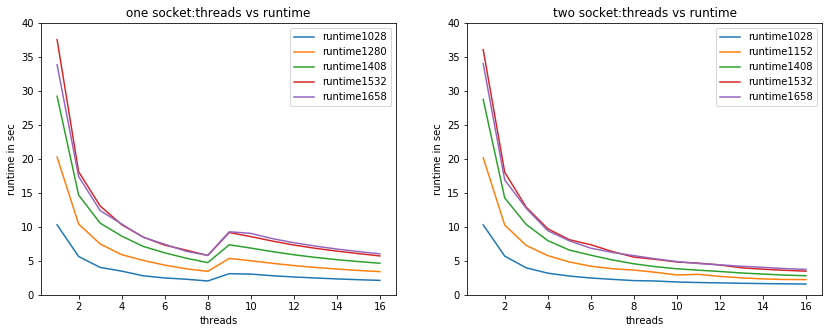

In [9]:
#1028.dat 1152.dat 1280.dat 1408.dat 1532.dat 1658.dat 1792.dat  2048.dat  2176.dat    2304.dat 2432.dat 2560.dat 
plt.figure(figsize=(14, 5))
ax = plt.subplot(1,2, 1)

ax.plot(threads, runtime1_1 ,label = "runtime1028") 
ax.plot(threads, runtime2_1 ,label = "runtime1280") 
ax.plot(threads, runtime3_1 ,label = "runtime1408") 
ax.plot(threads, runtime4_1 ,label = "runtime1532")
ax.plot(threads, runtime5_1 ,label = "runtime1658") 
ax.set_ylim(ymin=0,ymax = 40)
#setup
ax.legend()
plt.xlabel('threads')
plt.ylabel('runtime in sec') 
plt.title('one socket:threads vs runtime') 
ax = plt.subplot(1,2, 2)


ax.plot(threads, runtime1_2 ,label = "runtime1028")
ax.plot(threads, runtime2_2 ,label = "runtime1152") 
ax.plot(threads, runtime3_2 ,label = "runtime1408") 
ax.plot(threads, runtime4_2 ,label = "runtime1532")
ax.plot(threads, runtime5_2 ,label = "runtime1658") 
ax.set_ylim(ymin=0,ymax = 40)
#setup
ax.legend()

plt.xlabel('threads')
plt.ylabel('runtime in sec') 
plt.title('two socket:threads vs runtime') 




plt.show()


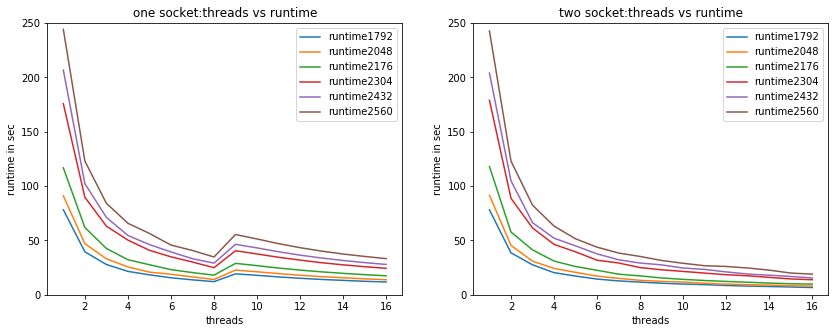

In [10]:
#1028.dat 1152.dat 1280.dat 1408.dat 1532.dat 1658.dat 1792.dat  2048.dat  2176.dat    2304.dat 2432.dat 2560.dat 

plt.figure(figsize=(14, 5))
ax = plt.subplot(1,2, 1)
ax.plot(threads, runtime7_1 ,label = "runtime1792") 
ax.plot(threads, runtime8_1 ,label = "runtime2048") 
ax.plot(threads, runtime9_1 ,label = "runtime2176")
ax.plot(threads, runtime10_1 ,label = "runtime2304") 
ax.plot(threads, runtime11_1 ,label = "runtime2432") 
ax.plot(threads, runtime12_1 ,label = "runtime2560")
ax.set_ylim(ymin=0,ymax = 250)
#setup
ax.legend()
plt.xlabel('threads')
plt.ylabel('runtime in sec') 
plt.title('one socket:threads vs runtime') 
ax = plt.subplot(1,2, 2)


ax.plot(threads, runtime7_2 ,label = "runtime1792") 
ax.plot(threads, runtime8_2 ,label = "runtime2048") 
ax.plot(threads, runtime9_2 ,label = "runtime2176")
ax.plot(threads, runtime10_2 ,label = "runtime2304") 
ax.plot(threads, runtime11_2 ,label = "runtime2432") 
ax.plot(threads, runtime12_2 ,label = "runtime2560")
ax.set_ylim(ymin=0,ymax = 250)
#setup
ax.legend()

plt.xlabel('threads')
plt.ylabel('runtime in sec') 
plt.title('two socket:threads vs runtime') 




plt.show()

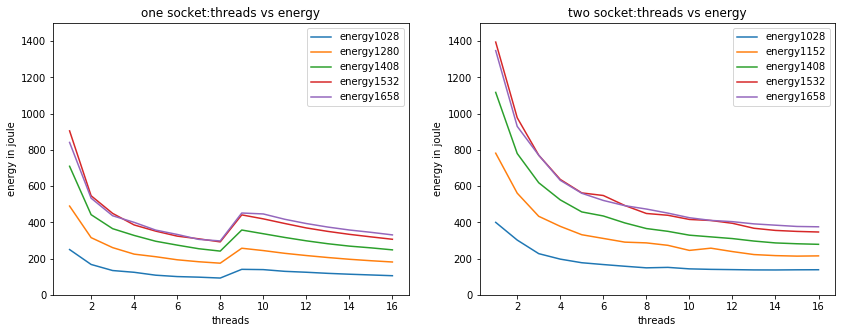

In [11]:
#1028.dat 1152.dat 1280.dat 1408.dat 1532.dat 1658.dat 1792.dat  2048.dat  2176.dat    2304.dat 2432.dat 2560.dat 
plt.figure(figsize=(14, 5))
ax = plt.subplot(1,2, 1)

ax.plot(threads, energy1_1 ,label = "energy1028") 
ax.plot(threads, energy2_1 ,label = "energy1280") 
ax.plot(threads, energy3_1 ,label = "energy1408") 
ax.plot(threads, energy4_1 ,label = "energy1532")
ax.plot(threads, energy5_1 ,label = "energy1658") 
ax.set_ylim(ymin=0,ymax=1500)
#setup
ax.legend()
plt.xlabel('threads')
plt.ylabel('energy in joule') 
plt.title('one socket:threads vs energy') 
ax = plt.subplot(1,2, 2)


ax.plot(threads, energy1_2 ,label = "energy1028")
ax.plot(threads, energy2_2 ,label = "energy1152") 
ax.plot(threads, energy3_2 ,label = "energy1408") 
ax.plot(threads, energy4_2 ,label = "energy1532")
ax.plot(threads, energy5_2 ,label = "energy1658") 
ax.set_ylim(ymin=0,ymax=1500)
#setup
ax.legend()

plt.xlabel('threads')
plt.ylabel('energy in joule') 
plt.title('two socket:threads vs energy') 




plt.show()


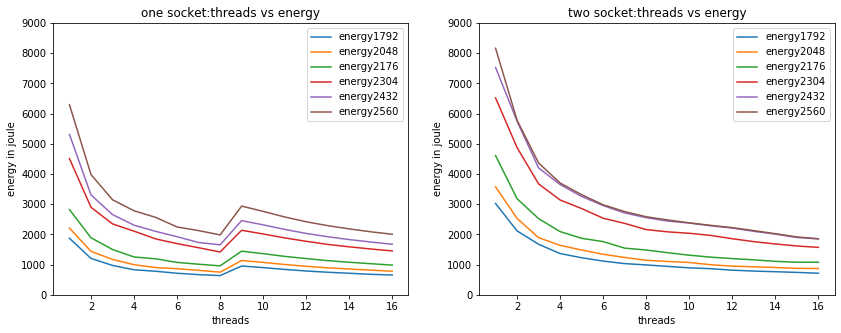

In [12]:
#1028.dat 1152.dat 1280.dat 1408.dat 1532.dat 1658.dat 1792.dat  2048.dat  2176.dat    2304.dat 2432.dat 2560.dat 

plt.figure(figsize=(14, 5))
ax = plt.subplot(1,2, 1)
ax.plot(threads, energy7_1 ,label = "energy1792") 
ax.plot(threads, energy8_1 ,label = "energy2048") 
ax.plot(threads, energy9_1 ,label = "energy2176")
ax.plot(threads, energy10_1 ,label = "energy2304") 
ax.plot(threads, energy11_1 ,label = "energy2432") 
ax.plot(threads, energy12_1 ,label = "energy2560")
ax.set_ylim(ymin=0,ymax=9000)
#setup
ax.legend()
plt.xlabel('threads')
plt.ylabel('energy in joule') 
plt.title('one socket:threads vs energy') 
ax = plt.subplot(1,2, 2)


ax.plot(threads, energy7_2 ,label = "energy1792") 
ax.plot(threads, energy8_2 ,label = "energy2048") 
ax.plot(threads, energy9_2 ,label = "energy2176")
ax.plot(threads, energy10_2 ,label = "energy2304") 
ax.plot(threads, energy11_2 ,label = "energy2432") 
ax.plot(threads, energy12_2 ,label = "energy2560")
ax.set_ylim(ymin=0,ymax=9000)
#setup
ax.legend()

plt.xlabel('threads')
plt.ylabel('energy in joule') 
plt.title('two socket:threads vs energy') 




plt.show()



Text(0.5, 1.0, 'two socket:power vs threads')

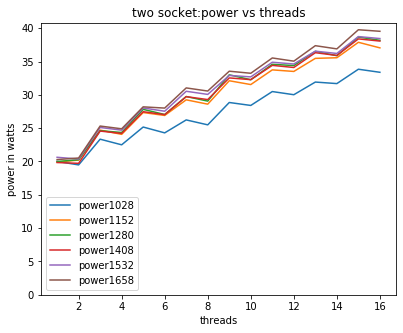

In [13]:
#1028.dat 1152.dat 1280.dat 1408.dat 1532.dat 1658.dat 1792.dat  2048.dat  2176.dat    2304.dat 2432.dat 2560.dat 
plt.figure(figsize=(14, 5))
ax.plot(threads, power1_1 ,label = "power1028") 
ax.plot(threads, power2_1 ,label = "power1152") 
ax.plot(threads, power3_1 ,label = "power1280") 
ax.plot(threads, power4_1 ,label = "power1408")
ax.plot(threads, power5_1 ,label = "power1532")
ax.plot(threads, power6_1 ,label = "power1658") 
ax.set_ylim(ymin=0)

plt.title("one socket:power vs threads")
#setup
ax.legend()
ax = plt.subplot(1,2, 2)




ax.plot(threads, power1_2 ,label = "power1028") 
ax.plot(threads, power2_2 ,label = "power1152") 
ax.plot(threads, power3_2 ,label = "power1280") 
ax.plot(threads, power4_2 ,label = "power1408")
ax.plot(threads, power5_2 ,label = "power1532")
ax.plot(threads, power6_2 ,label = "power1658") 
ax.set_ylim(ymin=0)
#setup

plt.legend()
plt.xlabel('threads')
plt.ylabel('power in watts') 
plt.title("two socket:power vs threads")








power1028 = two_socket_power[0][3::6]
power2048 = two_socket_power[1][3::6]
power256 = two_socket_power[2][3::6]
power512 = two_socket_power[3][3::6]
power64 = two_socket_power[4][3::6]

power1028_1 = one_socket_power[0][3::6]
power2048_1 = one_socket_power[1][3::6]
power256_1 = one_socket_power[2][3::6]
power512_1 = one_socket_power[3][3::6]
power64_1 = one_socket_power[4][3::6]

plt.figure(figsize=(14, 5))
ax = plt.subplot(1,2, 1)
ax.plot(threads, power2048_1 ,label = "power2048") 
ax.plot(threads, power1028_1 ,label = "power1028") 
ax.plot(threads, power256_1 ,label = "power256") 
ax.plot(threads, power512_1 ,label = "power512") 
ax.plot(threads, power64_1 ,label = "power64")
ax.set_ylim(ymin=0)
plt.title("one socket:power S1:pkg vs threads")
#setup
ax.legend()
ax = plt.subplot(1,2, 2)
ax.plot(threads, power2048 ,label = "power2048") 
ax.plot(threads, power1028 ,label = "power1028") 
ax.plot(threads, power256 ,label = "power256") 
ax.plot(threads, power512 ,label = "power512") 
ax.plot(threads, power64 ,label = "power64")
ax.set_ylim(ymin=0)
#setup
ax.legend()

plt.legend()
plt.xlabel('threads')
plt.ylabel('power in watts') 
plt.title("2")


plt.legend()
plt.xlabel('threads')
plt.ylabel('power in watts') 
plt.title('two socket:power S1:pkg vs threads') 
plt.show() 

In [14]:
# benchmark is simple interpolation
# 2045 

# 1532

# 1028 


# ideas for machine learning:
# -linear regression model setting limits on exponentials to reduce overfitting
# -neural network using pca to make it less complex
# LU Decomposition* (LUD) 
#  -dwarf:Dense Linear Algebra 
#  -domain:Linear Algebra


# what is the bottleneck at 1 core 8 threads?  thermal design power (TDP), inter-threadsharing overload?
# measure internal thread sharing?


(80, 1)


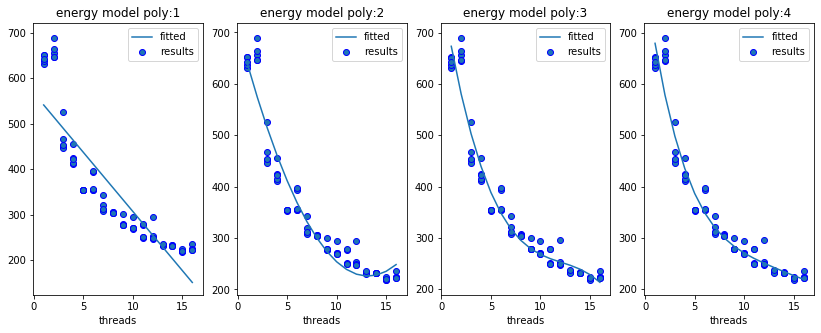

In [15]:
def elongate_list(threads,experiment):
    thread_list = []
    for i in range(experiment):
        for j in range(threads):
            thread_list.append(j+1)
    return thread_list

def add_dataset_class(datasets,threads,experiments):
    appendable = []
    for dataset in datasets:
        x = 0
        for j in range(threads*experiments):
            x+=1
            appendable.append([dataset,x])
            if x == 16:
                x = 0
    return appendable



#X is thread axis
X = np.array(elongate_list(16,5))
print(X[:, np.newaxis].shape)

#y is result axis
y = np.array([i[3] for i in two_socket_energy_samples[3]])

degrees = range(1,5)
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    pipeline.fit(X[:, np.newaxis], y)
    
    # Do we want to capture the outlier?
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                                 scoring="neg_mean_squared_error")
    X_test = np.linspace(1, 16,16)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="fitted")
    plt.scatter(X, y, edgecolor='b',  label="results")
    plt.xlabel("threads")
    plt.ylabel("")
    plt.title("energy model poly:"+ str(degrees[i]))
    plt.legend(loc="best")

plt.show()




182.959


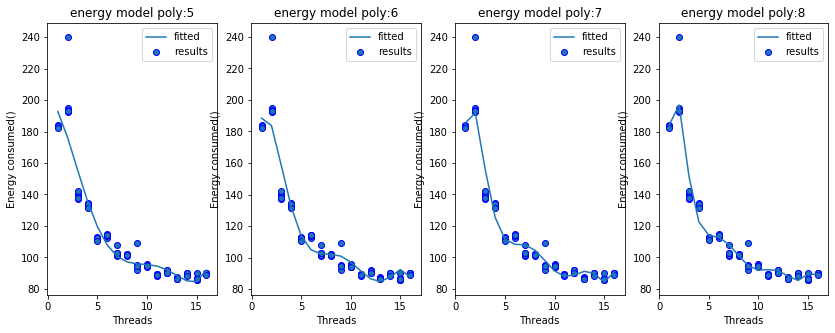

In [16]:


#X is thread axis
X = np.array(elongate_list(16,5))

#y is result axis
y = np.array([i[3] for i in two_socket_energy_samples[0]])
print(y[0])
degrees = range(5,9)
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    pipeline.fit(X[:, np.newaxis], y)
    
    X_test = np.linspace(1, 16,16)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="fitted")
    plt.scatter(X, y, edgecolor='b',  label="results")
    plt.xlabel("Threads")
    plt.ylabel("Energy consumed()")
    plt.title("energy model poly:"+ str(degrees[i]))
    plt.legend(loc="best")
plt.show()



In [17]:
#energy consumption

#two socket
training_half_sizes2 = [two_socket_energy_samples[datasetnr] for datasetnr in range(len(two_socket_energy_samples)) if datasetnr%2 == 0]
validation_half_sizes2 = [two_socket_energy_samples[datasetnr] for datasetnr in range(len(two_socket_energy_samples)) if datasetnr%2 == 1]
print(len(training_half_sizes2))


#one socket
training_half_sizes1 = [one_socket_energy_samples[datasetnr] for datasetnr in range(len(one_socket_energy_samples)) if datasetnr%2 == 0]
validation_half_sizes1 = [one_socket_energy_samples[datasetnr] for datasetnr in range(len(one_socket_energy_samples)) if datasetnr%2 == 1]
print(len(training_half_sizes1))


#one_socket no ht


5
5


In [18]:

def separate_ht(data):
    no_ht = []
    ht = []
    for dataset in data:
        dataset_no_ht = []
        dataset_ht = []
        nr = 0
        for val in dataset:
            nr+=1
            if nr <= 8:
                dataset_no_ht.append(val)
            else:
                dataset_ht.append(val)
            if nr == 16:
                nr = 0
        ht.append(dataset_ht)
        no_ht.append(dataset_no_ht)
    return no_ht,ht

training_no_ht,training_ht = separate_ht(training_half_sizes1)
valid_no_ht,valid_ht = separate_ht(validation_half_sizes1)

            
        
print(len(valid_no_ht))
print(len(valid_ht))
print(len(training_half_sizes1[0]))

4
4
80


In [19]:
"""
initialising x and y
"""

        

        
energy_two_socket = []
for i in range(len(training_half_sizes2)):
    for j in training_half_sizes2[i]:
        energy_two_socket.append(j[0]+j[3])
        

        
        
        
energy_one_socket = []
for i in range(len(training_half_sizes1)):
    for j in training_half_sizes1[i]:
        energy_one_socket.append(j[0])

print(len(energy_one_socket))
        
energy_no_ht = []

for i in range(len(training_no_ht)):
    for j in training_no_ht[i]:
        energy_no_ht.append(j[0])
        
        
print(len(energy_no_ht))
        
#validation

validation_two_socket = []
for i in range(len(validation_half_sizes2)):
    for j in validation_half_sizes2[i]:
        validation_two_socket.append(j[0]+j[3])
        
validation_one_socket = []
for i in range(len(validation_half_sizes1)):
    for j in validation_half_sizes1[i]:
        validation_one_socket.append(j[0])
        
validation_no_ht = []
for i in range(len(valid_no_ht)):
    for j in valid_no_ht[i]:
        validation_one_socket.append(j[0])





400
200


In [20]:
#X is thread axis
X_test = []
X_valid = []
#X = np.array(add_dataset_class([1028, 1152, 1280,1408, 1532, 1658, 1792, 2048, 2176 ],16,5))
#X1 = np.array(add_dataset_class([2304, 2432, 2560 ],16,5))

X_test = np.array(add_dataset_class([1028, 1280,1532,1792,2176],16,5))
X_valid = np.array(add_dataset_class([1152, 1408, 1658, 2048],16,5))

X_test_no_ht = np.array(add_dataset_class([1028, 1280,1532,1792,2176],8,5))
X_valid_no_ht = np.array(add_dataset_class([1152, 1408, 1658, 2048],8,5))

#y is result axis


ytwo_socket = np.array(energy_two_socket)

yone_socket = np.array(energy_one_socket)

yno_ht = np.array(energy_no_ht)




In [21]:
polynomial_features = PolynomialFeatures(degree=3,
                                         include_bias=False)

linear_regression = LinearRegression(normalize=True)
regr = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])


polynomial_features1 = PolynomialFeatures(degree=3,
                                         include_bias=False)
linear_regression1 = LinearRegression(normalize=True)

regr_1 = Pipeline([("polynomial_features", polynomial_features1),
                     ("linear_regression", linear_regression1)])

polynomial_features2 = PolynomialFeatures(degree=3,
                                         include_bias=False)
linear_regression2 = LinearRegression(normalize=True)

regr_no_HT = Pipeline([("polynomial_features", polynomial_features2),
                     ("linear_regression", linear_regression2)])




regr.fit(X_test, ytwo_socket)
regr_1.fit(X_test, yone_socket)
regr_no_HT.fit(X_test_no_ht, yno_ht)
print(regr.get_params(linear_regression))

{'memory': None, 'steps': [('polynomial_features', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))], 'verbose': False, 'polynomial_features': PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C'), 'linear_regression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True), 'polynomial_features__degree': 3, 'polynomial_features__include_bias': False, 'polynomial_features__interaction_only': False, 'polynomial_features__order': 'C', 'linear_regression__copy_X': True, 'linear_regression__fit_intercept': True, 'linear_regression__n_jobs': None, 'linear_regression__normalize': True}


In [22]:
print(regr)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)


In [23]:
#1028.dat 1152.dat 1280.dat 1408.dat 1532.dat 1658.dat 1792.dat  2048.dat  2176.dat    
# test datasets:1028, 1280,1532,1792,2176
# validation 1152, 1408, 1658, 2048

# two socket
predicted_1 = []
predicted_2 = []
predicted_3 = []
predicted_4 = []

#control
predicted_check1 = []
predicted_check2 = []

#one socket
predicted_11 = []
predicted_21 = []
predicted_31 = []
predicted_41 = []

#no ht
predicted_12 = []
predicted_22 = []
predicted_32 = []
predicted_42 = []

for i in threads:
    predicted_1.append(regr.predict([[1152, i]]))
    predicted_2.append(regr.predict([[1408, i]]))
    predicted_3.append(regr.predict([[1658, i]]))
    predicted_4.append(regr.predict([[2048, i]]))
    predicted_check1.append(regr.predict([[1280, i]]))
    
    predicted_11.append(regr_1.predict([[1152, i]]))
    predicted_21.append(regr_1.predict([[1408, i]]))
    predicted_31.append(regr_1.predict([[1658, i]]))
    predicted_41.append(regr_1.predict([[2048, i]]))
    
    if i<=8:
        predicted_12.append(regr_no_HT.predict([[1152, i]]))
        predicted_22.append(regr_no_HT.predict([[1408, i]]))
        predicted_32.append(regr_no_HT.predict([[1658, i]]))
        predicted_42.append(regr_no_HT.predict([[2048, i]]))

    
print(predicted_1[0])
print(energy_two_socket[0])


[853.46006152]
480.366


In [24]:
def nmser(x,y):
    z=0
    if len(x)==len(y):
        for k in range(len(x)):
            z+=(((x[k]-y[k])**2)/x[k])    
        z=z/(len(x))
    return z

In [25]:
#1152
error_list =[]
a = np.array(predicted_1)
b = np.array(validation_two_socket[0:16]) 
meansquared_error = ((a-b)**2).mean(axis=1)
error_list.append(sum(meansquared_error))

a = np.array(predicted_2)
b = np.array(validation_two_socket[80:96]) 
meansquared_error = ((a-b)**2).mean(axis=1)
error_list.append(sum(meansquared_error))

a = np.array(predicted_3)
b = np.array(validation_two_socket[160:176]) 
meansquared_error = ((a-b)**2).mean(axis=1)
error_list.append(sum(meansquared_error))

a = np.array(predicted_4)
b = np.array(validation_two_socket[240:256]) 
meansquared_error = ((a-b)**2).mean(axis=1)
error_list.append(sum(meansquared_error))

print(error_list)


[1208470.8868823498, 3570248.7364997147, 7387560.252872696, 25904558.5483355]


In [26]:
predicted_1

[array([853.46006152]),
 array([587.33973974]),
 array([397.04991729]),
 array([271.97008406]),
 array([201.47972997]),
 array([174.95834491]),
 array([181.78541878]),
 array([211.34044147]),
 array([253.0029029]),
 array([296.15229296]),
 array([330.16810154]),
 array([344.42981856]),
 array([328.31693391]),
 array([271.20893749]),
 array([162.4853192]),
 array([-8.47443106])]

In [27]:
predicted_11

[array([589.5284553]),
 array([364.49200021]),
 array([211.79223752]),
 array([120.79401164]),
 array([80.86216696]),
 array([81.36154789]),
 array([111.65699883]),
 array([161.11336417]),
 array([219.09548832]),
 array([274.96821567]),
 array([318.09639063]),
 array([337.8448576]),
 array([323.57846098]),
 array([264.66204517]),
 array([150.46045456]),
 array([-29.66146644])]

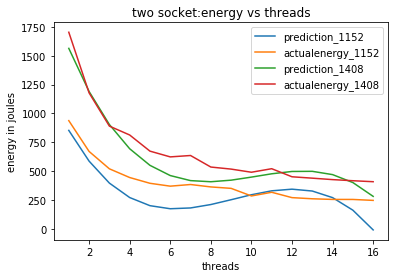

[-417.76868031]
[23.29438426]


In [28]:



plt.plot(threads, predicted_1 ,label = "prediction_1152") 
plt.plot(threads, validation_two_socket[0:16] ,label = "actualenergy_1152") 
plt.plot(threads, predicted_2 ,label = "prediction_1408") 
plt.plot(threads, validation_two_socket[80:96] ,label = "actualenergy_1408") 

plt.legend()
plt.xlabel('threads')
plt.ylabel('energy in joules')
plt.title('two socket:energy vs threads') 
plt.show()



print(nmser(predicted_1,validation_two_socket[0:16]))
print(nmser(predicted_2,validation_two_socket[80:96]))

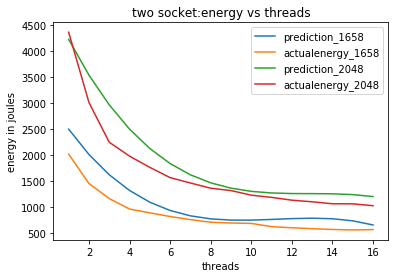

[48.41913688]
[373.29435015]


In [29]:
plt.plot(threads, predicted_3 ,label = "prediction_1658") 
plt.plot(threads, validation_two_socket[160:176] ,label = "actualenergy_1658") 
plt.plot(threads, predicted_4 ,label = "prediction_2048") 
plt.plot(threads, validation_two_socket[240:256] ,label = "actualenergy_2048") 

plt.legend()
plt.xlabel('threads')
plt.ylabel('energy in joules') 
plt.title('two socket:energy vs threads') 
plt.show() 


print(nmser(predicted_3,validation_two_socket[160:176]))
print(nmser(predicted_3,validation_two_socket[240:256]))

Now trying:

0-8 - single socket, no HT

0-16 - single socket, HT 

0-16 - dual socket, no HT 

0-32 - dual socket, HT  


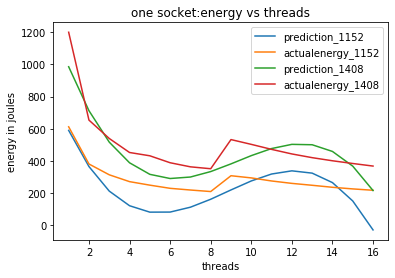

[-60.15073972]
[22.49261421]


In [30]:
#standard training on hyperthreading experiment


plt.plot(threads, predicted_11 ,label = "prediction_1152") 
plt.plot(threads, validation_one_socket[0:16] ,label = "actualenergy_1152") 
plt.plot(threads, predicted_21 ,label = "prediction_1408") 
plt.plot(threads, validation_one_socket[80:96] ,label = "actualenergy_1408") 

plt.legend()
plt.xlabel('threads')
plt.ylabel('energy in joules')
plt.title('one socket:energy vs threads') 
plt.show()



print(nmser(predicted_11,validation_one_socket[0:16]))
print(nmser(predicted_21,validation_one_socket[80:96]))


how did i get these results.

used data that was outside cache(l1,L2,L3)


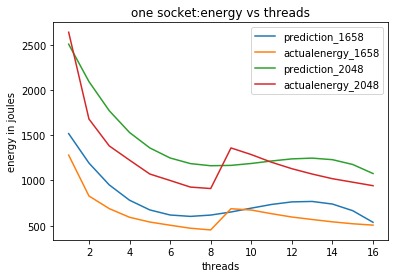

[35.97557976]
[38.55010239]


In [31]:
plt.plot(threads, predicted_31 ,label = "prediction_1658") 
plt.plot(threads, validation_one_socket[160:176] ,label = "actualenergy_1658") 
plt.plot(threads, predicted_41 ,label = "prediction_2048") 
plt.plot(threads, validation_one_socket[240:256] ,label = "actualenergy_2048") 

plt.legend()
plt.xlabel('threads')
plt.ylabel('energy in joules') 
plt.title('one socket:energy vs threads') 
plt.show()

print(nmser(predicted_31,validation_one_socket[160:176]))
print(nmser(predicted_41,validation_one_socket[240:256]))

In [32]:
#no ht
predicted_12


[array([631.17302885]),
 array([360.92113285]),
 array([185.14580985]),
 array([89.19773393]),
 array([58.42757915]),
 array([78.18601961]),
 array([133.82372936]),
 array([210.69138248])]

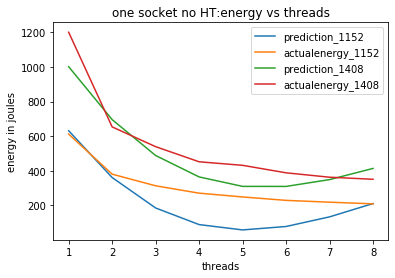

[178.09064657]
[18.26221722]


In [33]:
#standard training on hyperthreading experiment


plt.plot(threads_no_ht, predicted_12 ,label = "prediction_1152") 
plt.plot(threads_no_ht, validation_one_socket[0:8] ,label = "actualenergy_1152") 
plt.plot(threads_no_ht, predicted_22 ,label = "prediction_1408") 
plt.plot(threads_no_ht, validation_one_socket[80:88] ,label = "actualenergy_1408") 

plt.legend()
plt.xlabel('threads')
plt.ylabel('energy in joules')
plt.title('one socket no HT:energy vs threads') 
plt.show()

print(nmser(predicted_12,validation_one_socket[0:8]))
print(nmser(predicted_22,validation_one_socket[80:88]))

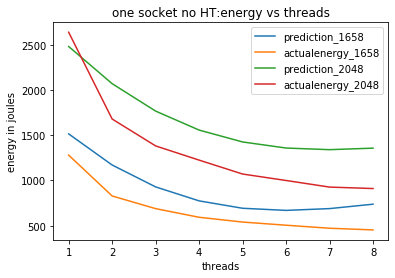

[1616.70926301]
[1586.16777141]


In [34]:
plt.plot(threads_no_ht, predicted_32 ,label = "prediction_1658") 
plt.plot(threads_no_ht, validation_one_socket[160:168] ,label = "actualenergy_1658") 

plt.plot(threads_no_ht, predicted_42 ,label = "prediction_2048") 
plt.plot(threads_no_ht, validation_one_socket[240:248] ,label = "actualenergy_2048") 

plt.legend()
plt.xlabel('threads')
plt.ylabel('energy in joules') 
plt.title('one socket no HT:energy vs threads') 
plt.show() 

print(nmser(predicted_12,validation_one_socket[160:168]))
print(nmser(predicted_22,validation_one_socket[240:248]))

In [35]:




print(yone_socket)

[ 293.031  195.827  160.32   140.36   129.598  122.089  128.192  111.323
  169.926  165.183  155.871  148.473  142.187  136.26   131.226  126.01
  308.379  224.609  161.267  177.119  130.559  121.368  114.926  109.947
  170.042  165.815  155.746  148.902  141.997  136.283  131.673  126.88
  304.595  195.018  160.852  140.925  129.517  120.44   113.825  111.614
  167.328  165.021  155.276  150.284  142.16   136.377  131.615  126.292
  299.689  196.072  160.324  140.308  129.895  119.79   113.83   110.179
  168.206  165.284  154.665  150.32   141.841  136.064  131.324  126.474
  292.089  193.164  160.766  146.6    129.85   119.777  113.303  111.781
  167.594  172.724  155.308  148.677  142.102  136.594  131.211  126.433
  840.49   527.604  428.538  401.457  363.911  326.874  294.162  293.791
  427.223  403.836  379.163  356.68   337.433  322.177  311.704  297.496
  828.761  525.237  424.277  403.806  339.366  359.407  295.12   284.8
  430.659  404.491  379.019  357.075  337.255  322.068 

In [36]:
X_test

array([[1028,    1],
       [1028,    2],
       [1028,    3],
       [1028,    4],
       [1028,    5],
       [1028,    6],
       [1028,    7],
       [1028,    8],
       [1028,    9],
       [1028,   10],
       [1028,   11],
       [1028,   12],
       [1028,   13],
       [1028,   14],
       [1028,   15],
       [1028,   16],
       [1028,    1],
       [1028,    2],
       [1028,    3],
       [1028,    4],
       [1028,    5],
       [1028,    6],
       [1028,    7],
       [1028,    8],
       [1028,    9],
       [1028,   10],
       [1028,   11],
       [1028,   12],
       [1028,   13],
       [1028,   14],
       [1028,   15],
       [1028,   16],
       [1028,    1],
       [1028,    2],
       [1028,    3],
       [1028,    4],
       [1028,    5],
       [1028,    6],
       [1028,    7],
       [1028,    8],
       [1028,    9],
       [1028,   10],
       [1028,   11],
       [1028,   12],
       [1028,   13],
       [1028,   14],
       [1028,   15],
       [1028,